### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [4]:
### Get the Data

In [3]:
bike=pd.read_csv('train.csv')

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10886 non-null  int64  
 1   datetime    10886 non-null  object 
 2   season      10886 non-null  object 
 3   holiday     10886 non-null  object 
 4   workingday  10886 non-null  object 
 5   weather     10886 non-null  object 
 6   temp        10886 non-null  float64
 7   atemp       10886 non-null  float64
 8   humidity    10886 non-null  int64  
 9   windspeed   10886 non-null  float64
 10  casual      10886 non-null  int64  
 11  registered  10886 non-null  int64  
 12  count       10886 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [5]:
bike.describe()

,id,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,5443.500000,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,3142.661849,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2722.250000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,5443.500000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,8164.750000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,10886.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
bike.head()

,id,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1/1/2011 0:00,spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,2,1/1/2011 1:00,spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,3,1/1/2011 2:00,spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,4,1/1/2011 3:00,spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,5,1/1/2011 4:00,spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


In [9]:
bike['datetime']=pd.to_datetime(bike['datetime'])
bike['Year'] = bike['datetime'].apply(lambda time: time.year)
bike['Month'] = bike['datetime'].apply(lambda time: time.month)
bike['Day of Week'] = bike['datetime'].apply(lambda time: time.dayofweek)
bike['Date'] = bike['datetime'].apply(lambda time: time.day)
bike['Hour'] = bike['datetime'].apply(lambda time: time.hour)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike['Day of Week'] = bike['Day of Week'].map(dmap)


### Exploratory Data Analysis

In [10]:
bikecorr=bike.corr().drop('id',axis=1)
bikecorr['count']

id            0.310810
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Year          0.260403
Month         0.166862
Date          0.019826
Hour          0.400601
Name: count, dtype: float64

<AxesSubplot:>

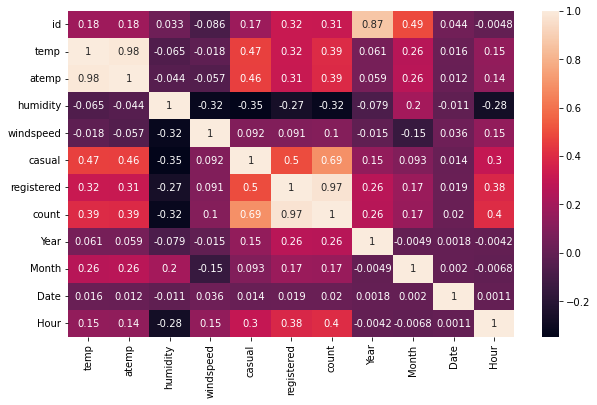

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(bikecorr,annot=True)

In [12]:
hour=bike.groupby('Hour').sum()

Text(0.5, 1.0, 'Bike Demands by hour')

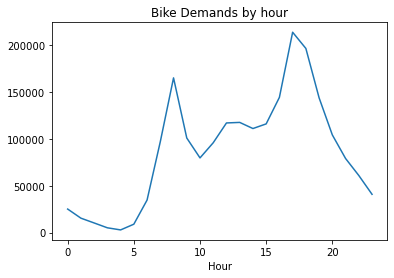

In [13]:
hour['count'].plot()
plt.title('Bike Demands by hour')

From the graph, we can see that hour 18(6PM) has the highest bike demands, and the number of bike demands exceed 200,000. We also detect another peak which is around 8 Am. 

C:\Users\Daisy\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Users\Daisy\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.0, 'Bike Demands by Month')

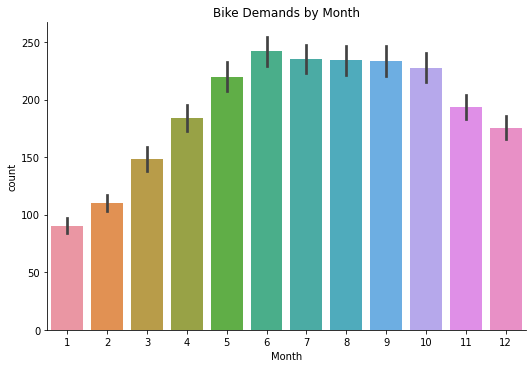

In [14]:
#month=bike.groupby('Month').sum()
#month['count'].plot(color='green')

sns.factorplot(x="Month",y="count",data=bike,kind='bar',size=5,aspect=1.5)
plt.title('Bike Demands by Month')

Text(0.5, 1.0, 'Bike Demands by Day of Week')

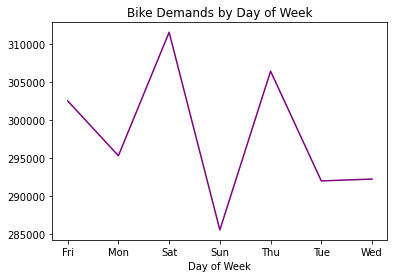

In [15]:
dayOfWeek=bike.groupby('Day of Week').sum()
dayOfWeek['count'].plot(color='purple')
plt.title('Bike Demands by Day of Week')


#sns.factorplot(x="Day of Week",y="count",data=bike,kind='bar',size=5,aspect=1.5)
#plt.title('Bike Demands by Day of Week')

Text(0.5, 1.0, 'Bike Demands by Day of Year')

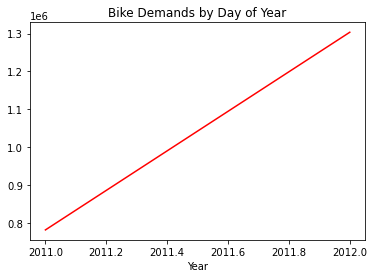

In [16]:
bike.groupby('Year').sum()['count'].plot(color='red')
plt.title('Bike Demands by Day of Year')


Text(0.5, 1.0, 'Holiday Count')

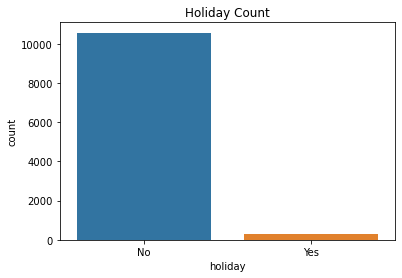

In [17]:
sns.countplot(x='holiday',data=bike)
plt.title('Holiday Count')

Text(0.5, 1.0, 'Bike Demands by Season')

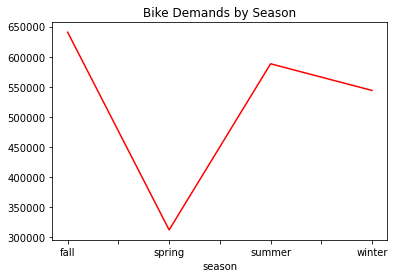

In [18]:
bike.groupby('season').sum()['count'].plot(color='red')
plt.title('Bike Demands by Season')

C:\Users\Daisy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Bike Demand')

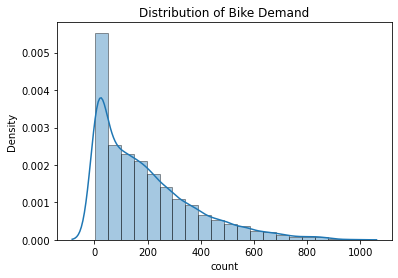

In [45]:
sns.distplot(bike['count'],bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Bike Demand')

<AxesSubplot:xlabel='weather', ylabel='count'>

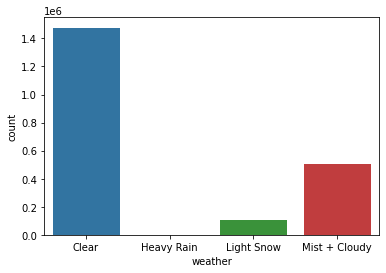

In [20]:
season=bike.groupby('weather').sum()['count'].reset_index()
sns.barplot(x='weather',y='count',data=season)


###  Data process

#### Check missing data

In [21]:
bike.isnull().sum()

id             0
datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
Year           0
Month          0
Day of Week    0
Date           0
Hour           0
dtype: int64

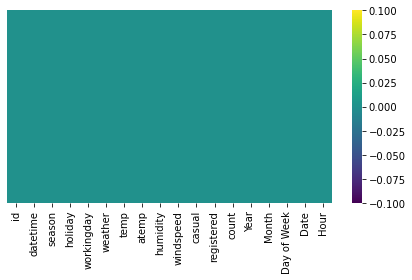

In [22]:
sns.heatmap(bike.isnull(),yticklabels=False, cbar=True, cmap='viridis')
plt.tight_layout()

#### Fix Datatypes

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
bike['holiday']=encoder.fit_transform(bike['holiday'])
bike['workingday']=encoder.fit_transform(bike['workingday'])
bike['season']=encoder.fit_transform(bike['season'])
bike['weather']=encoder.fit_transform(bike['weather'])
bike['Day of Week']=encoder.fit_transform(bike['Day of Week'])

In [24]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           10886 non-null  int64         
 1   datetime     10886 non-null  datetime64[ns]
 2   season       10886 non-null  int32         
 3   holiday      10886 non-null  int32         
 4   workingday   10886 non-null  int32         
 5   weather      10886 non-null  int32         
 6   temp         10886 non-null  float64       
 7   atemp        10886 non-null  float64       
 8   humidity     10886 non-null  int64         
 9   windspeed    10886 non-null  float64       
 10  casual       10886 non-null  int64         
 11  registered   10886 non-null  int64         
 12  count        10886 non-null  int64         
 13  Year         10886 non-null  int64         
 14  Month        10886 non-null  int64         
 15  Day of Week  10886 non-null  int32         
 16  Date

#### Splitting into a Training/Test set

In [25]:
from sklearn.model_selection import train_test_split
X =bike.drop(['count','datetime','casual','registered'],axis=1)
y =bike['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [26]:
## Fit the data

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
prediction_lm = lm.predict( X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prediction_lm))

MAE: 105.29740479511345


#### Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
prediction_rf= forest.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,prediction_rf))

C:\Users\Daisy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



MAE: 25.5144052357624


### Naive Bayes Model

In [36]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)
prediction_nb= nbmodel.predict(X_test)

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prediction_nb))

MAE: 200.42651561543173


## Similar Approach to the provided test data

In [ ]:
testdf=pd.read_csv('test.csv')

In [ ]:
testdf.head()

In [ ]:
testdf['datetime']=pd.to_datetime(testdf['datetime'])
testdf['Year'] = testdf['datetime'].apply(lambda time: time.year)
testdf['Month'] = testdf['datetime'].apply(lambda time: time.month)
testdf['Day of Week'] = testdf['datetime'].apply(lambda time: time.dayofweek)
testdf['Date'] = testdf['datetime'].apply(lambda time: time.day)
testdf['Hour'] = testdf['datetime'].apply(lambda time: time.hour)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
testdf['Day of Week'] = testdf['Day of Week'].map(dmap)

In [ ]:
encoder=LabelEncoder()
testdf['holiday']=encoder.fit_transform(testdf['holiday'])
testdf['workingday']=encoder.fit_transform(testdf['workingday'])
testdf['season']=encoder.fit_transform(testdf['season'])
testdf['weather']=encoder.fit_transform(testdf['weather'])
testdf['Day of Week']=encoder.fit_transform(testdf['Day of Week'])

In [ ]:
test=testdf.drop(columns='datetime',axis=1)
prediction_test= forest.predict(test)

In [ ]:
my_submission = pd.DataFrame({'id': testdf.id, 'count': prediction_test})
my_submission.to_csv('submission.csv', index=False)